# F15. Numpy and Neural Network

## 1. Neural Network

### 1-1. Layer Perceptron : MNSIT Revisited

In [58]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# MNIST 데이터를 로드 및 다운로드
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

# 모델에 따른 데이터 가공
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
x_train_reshaped = x_train_norm.reshape(-1, x_train_norm.shape[1]*x_train_norm.shape[2])
x_test_reshaped = x_test_norm.reshape(-1, x_test_norm.shape[1]*x_test_norm.shape[2])

# 모델 구성 - 2 Layer Perceptron
model=keras.models.Sequential()
model.add(keras.layers.Dense(50, activation='sigmoid', input_shape=(784,)))  # 입력층 d=784, 은닉층 레이어 H=50
model.add(keras.layers.Dense(10, activation='softmax'))   # 출력층 레이어 K=10
model.summary()

# 모델 구성 및 학습
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train_reshaped, y_train, epochs=10)

# 모델 평가
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8413 - accuracy: 0.8086
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2443 - accuracy: 0.9309
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1864 - accuracy: 0.9472
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1545 - accuracy: 0.9561
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1307 - accuracy: 0.9619
Ep

In [59]:
# MNIST 손글씨 분류기 Numpy 변경
print(x_train_reshaped.shape) # 입력층 데이터 모양(shape)

X = x_train_reshaped[:5] # 테스트 목적 x_train_reshaped 앞 5개의 데이터 확인
print(X.shape)

(60000, 784)
(5, 784)


In [60]:
# 입력층 데이터의 모양(shape)
print("x_train_reshaped.shape :", x_train_reshaped.shape)

# 테스트를 위해 x_train_reshaped의 앞 5개의 데이터를 가져온다.
X = x_train_reshaped[:5]
print("X.shape :", X.shape)

weight_init_std = 0.1
input_size = 784 # 입력층 노드수
hidden_size=50 # 히든층 노드수

# 인접 레이어간 관계를 나타내는 파라미터 W를 생성하고 random 초기화
W1 = weight_init_std * np.random.randn(input_size, hidden_size)  

# 바이어스 파라미터 b를 생성하고 Zero로 초기화
b1 = np.zeros(hidden_size)

a1 = np.dot(X, W1) + b1 # 은닉층 출력

print("W1.shape :", W1.shape)
print("b1.shape :", b1.shape)
print("a1.shape :", a1.shape)

x_train_reshaped.shape : (60000, 784)
X.shape : (5, 784)
W1.shape : (784, 50)
b1.shape : (50,)
a1.shape : (5, 50)


In [61]:
# 테스트용 x_train_reshaped 출력
# 입력값에 입력층 레이어의 개수만큼의 열이 있음(784)
X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [62]:
# W1은 레이어 관계로, (784, 50) 행렬로 입력층과 은닉층의 레이어 수가 적용
# W1을 구성하는 weight_init_std를 곱하는 것은 가중치?
# np.random.randn(input_size, hidden_size))는 가우시안 분포로 난수 적용(랜덤)

print("np.random.randn(input_size, hidden_size) :", np.random.randn(input_size, hidden_size))  
print("W1 :", W1)

np.random.randn(input_size, hidden_size) : [[ 1.46852147  0.14546207 -0.88055115 ...  1.78349241 -0.17150591
   0.39996361]
 [ 0.06080134  1.66066836 -0.03162674 ...  1.13232375 -0.21847511
  -2.57227503]
 [-0.59128061 -0.42132061 -0.81623952 ...  0.19362163  2.25858619
  -1.79941709]
 ...
 [ 0.12531991 -0.17262027  0.2903992  ...  0.98284371  1.35261059
   1.7447601 ]
 [-0.74791104  0.37025822  0.86461611 ...  0.30672621  1.10000301
   1.47225122]
 [-1.24469354  0.22047195  0.07378312 ... -1.76859392 -1.14159812
   0.3544597 ]]
W1 : [[-0.058353   -0.06140181 -0.06166726 ... -0.08292179 -0.0150748
   0.15476538]
 [ 0.09935193 -0.0155833  -0.09983189 ... -0.00722338  0.01032683
  -0.04607381]
 [ 0.25900173 -0.03441765  0.12989731 ...  0.09742154 -0.04093246
   0.04199378]
 ...
 [ 0.08735813  0.11964248 -0.16612806 ... -0.0092834  -0.20651865
   0.14851002]
 [-0.0052667   0.16367941  0.06620925 ...  0.12243768  0.03071117
  -0.09150339]
 [ 0.15080454 -0.11182861  0.03479277 ... -0.030668

In [63]:
# 첫 번째 데이터 은닉층 출력
a1[0] # 50dim

array([-0.64692905,  1.60314145,  0.27041901,  0.32223896,  0.16596337,
        0.78899029, -0.12837848, -0.23048789,  1.68618408, -1.64646846,
        0.99940115, -1.28517841, -0.10105653, -1.14186393,  0.3477459 ,
       -0.00715804,  0.6839424 , -0.27001866,  0.26572436,  1.06299018,
        1.41952307,  0.37365666,  0.71918499, -0.34692995,  1.17961416,
       -0.74371378, -0.88602321,  0.85120816, -0.04243581,  1.74786874,
       -0.02220419, -0.50920799, -0.00655761,  0.04193718, -1.26184178,
        0.7351617 , -0.19759718, -0.76120202,  0.50454569,  0.25862719,
       -0.02996498, -0.33979586,  0.13636333, -0.94732093, -0.12519037,
       -0.77687384,  0.85069968, -1.29950343,  0.59978267,  1.53386279])

### 1-2. Activation Functions and Loss Functions

#### 1-2-1. Sigmoid

In [32]:
# 위 수식의 sigmoid 함수를 구현해 봅니다.
def sigmoid(x):
    return 1 / (1 + np.exp(-x))  


z1 = sigmoid(a1)
print(z1[0])  # sigmoid의 출력은 모든 element가 0에서 1사이

[0.49139551 0.45880814 0.55579686 0.5550321  0.41944501 0.45059766
 0.3669098  0.61058032 0.60820968 0.56727145 0.8307918  0.7376851
 0.26492062 0.79409077 0.69742382 0.49220668 0.62815478 0.27015655
 0.53803194 0.62420004 0.37213348 0.51802744 0.65309224 0.58435402
 0.57567632 0.58654954 0.26704442 0.78267951 0.12772931 0.70575652
 0.57492988 0.40890373 0.50659121 0.2522381  0.58192214 0.35712419
 0.32568425 0.75365604 0.41268275 0.65990378 0.53666129 0.44602912
 0.63483209 0.191191   0.18257856 0.35357597 0.66088587 0.54921061
 0.60522611 0.67026645]


In [33]:
# 단일 레이어 구현 함수
def affine_layer_forward(X, W, b):
    y = np.dot(X, W) + b
    cache = (X, W, b)
    return y, cache

print('go~')

go~


In [34]:
input_size = 784
hidden_size = 50
output_size = 10

W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

a1, cache1 = affine_layer_forward(X, W1, b1)
z1 = sigmoid(a1)
a2, cache2 = affine_layer_forward(z1, W2, b2)    # z1이 다시 두번째 레이어의 입력이 됩니다. 

print(a2[0])  # 최종 출력이 output_size만큼의 벡터가 되었습니다.

[-0.47374553  0.00913184  0.14091983 -0.33422352 -0.12113985 -1.12871204
 -0.25727274  0.19947448  0.34541859  0.10409944]


In [35]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

In [36]:
y_hat = softmax(a2)
y_hat[0]  # 10개의 숫자 중 하나일 확률이 되었습니다.

array([0.0675003 , 0.10939984, 0.12481061, 0.07760673, 0.09603741,
       0.03506367, 0.0838144 , 0.13233705, 0.15313138, 0.12029861])

#### 1-2-2. Tanh

#### 1-2-3. ReLU

### 1-3. Loss Functions

#### 1-3-1. Cross Entropy

In [37]:
# 정답 라벨을 One-hot 인코딩하는 함수
def _change_ont_hot_label(X, num_category):
    T = np.zeros((X.size, num_category))
    for idx, row in enumerate(T):
        row[X[idx]] = 1
 
    return T

Y_digit = y_train[:5]
t = _change_ont_hot_label(Y_digit, 10)
t     # 정답 라벨의 One-hot 인코딩

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [38]:
print(y_hat[0])
print(t[0])

[0.0675003  0.10939984 0.12481061 0.07760673 0.09603741 0.03506367
 0.0838144  0.13233705 0.15313138 0.12029861]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [39]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

Loss = cross_entropy_error(y_hat, t)
Loss

2.4880986061739505

#### 1-3-2. Cross Entropy

### 1-4. Gradient Descent

In [40]:
batch_num = y_hat.shape[0]
dy = (y_hat - t) / batch_num
dy    # softmax값의 출력으로 Loss를 미분한 값

array([[ 0.01350006,  0.02187997,  0.02496212,  0.01552135,  0.01920748,
        -0.19298727,  0.01676288,  0.02646741,  0.03062628,  0.02405972],
       [-0.18731595,  0.02382153,  0.02757819,  0.01428375,  0.01643681,
         0.00802808,  0.01376619,  0.02961997,  0.03022884,  0.02355259],
       [ 0.01504179,  0.02528016,  0.02302705,  0.01786809, -0.17649223,
         0.00726268,  0.01440606,  0.02892093,  0.02445269,  0.02023277],
       [ 0.01254741, -0.17560797,  0.02149984,  0.01483544,  0.01992122,
         0.00844614,  0.01381669,  0.02577862,  0.03398129,  0.02478133],
       [ 0.01222028,  0.02920747,  0.02036246,  0.0150658 ,  0.02001563,
         0.00754507,  0.01182567,  0.03024501,  0.02869798, -0.17518537]])

In [41]:
dW2 = np.dot(z1.T, dy)    
dW2

array([[-0.02105676, -0.07978616,  0.04608394,  0.03108979, -0.02537567,
        -0.06118663,  0.02830438,  0.0559527 ,  0.0609226 , -0.0349482 ],
       [-0.04266698, -0.05917842,  0.06058891,  0.04177973, -0.09289945,
        -0.01974469,  0.03637418,  0.07563648,  0.077569  , -0.07745876],
       [-0.07294141, -0.02792202,  0.0533523 ,  0.03601754, -0.08327801,
        -0.00703004,  0.03134849,  0.06597365,  0.06657442, -0.06209492],
       [-0.0814575 , -0.08366916,  0.07376566,  0.04790226, -0.02572833,
        -0.14114702,  0.04484512,  0.08665618,  0.09438818, -0.01555538],
       [-0.0521748 , -0.03219181,  0.056395  ,  0.03777446, -0.02817843,
        -0.06179012,  0.03374609,  0.06977469,  0.07268796, -0.09604303],
       [-0.11638746, -0.01290194,  0.07584651,  0.04886316, -0.03062177,
        -0.1323308 ,  0.04513202,  0.09011812,  0.09449325, -0.06221109],
       [-0.04356012, -0.10205822,  0.05029381,  0.03297709, -0.00324925,
        -0.07805153,  0.03074561,  0.05962307

In [42]:
dW2 = np.dot(z1.T, dy)
db2 = np.sum(dy, axis=0)

In [43]:
def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

In [44]:
dz1 = np.dot(dy, W2.T)
da1 = sigmoid_grad(a1) * dz1
dW1 = np.dot(X.T, da1)
db1 = np.sum(dz1, axis=0)

In [45]:
learning_rate = 0.1

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    return W1, b1, W2, b2

### 1-5. Backpropagation

In [46]:
def affine_layer_backward(dy, cache):
    X, W, b = cache
    dX = np.dot(dy, W.T)
    dW = np.dot(X.T, dy)
    db = np.sum(dy, axis=0)
    return dX, dW, db

In [47]:
# 파라미터 초기화
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

# Forward Propagation
a1, cache1 = affine_layer_forward(X, W1, b1)
z1 = sigmoid(a1)
a2, cache2 = affine_layer_forward(z1, W2, b2)

# 추론과 오차(Loss) 계산
y_hat = softmax(a2)
t = _change_ont_hot_label(Y_digit, 10)   # 정답 One-hot 인코딩
Loss = cross_entropy_error(y_hat, t)

print(y_hat)
print(t)
print('Loss: ', Loss)
        
dy = (y_hat - t) / X.shape[0]
dz1, dW2, db2 = affine_layer_backward(dy, cache2)
da1 = sigmoid_grad(a1) * dz1
dX, dW1, db1 = affine_layer_backward(da1, cache1)

# 경사하강법을 통한 파라미터 업데이트    
learning_rate = 0.1
W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

[[0.04368266 0.05961519 0.12970551 0.09342282 0.09693392 0.1424948
  0.07681323 0.04489682 0.16595229 0.14648276]
 [0.04369926 0.06907336 0.10932632 0.1052114  0.07998448 0.15768372
  0.07694194 0.05470809 0.15217881 0.15119262]
 [0.04641183 0.06060176 0.13999695 0.10511534 0.08237165 0.13521439
  0.07115754 0.06081984 0.15436233 0.14394839]
 [0.04870311 0.05319029 0.13348306 0.10743142 0.0885941  0.15496289
  0.07090937 0.05872726 0.14793759 0.13606091]
 [0.03781398 0.05676919 0.15709204 0.13010145 0.0738811  0.1547007
  0.06921221 0.04807552 0.15166367 0.12069014]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Loss:  2.524759214850217


In [48]:
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

def train_step(X, Y, W1, b1, W2, b2, learning_rate=0.1, verbose=False):
    a1, cache1 = affine_layer_forward(X, W1, b1)
    z1 = sigmoid(a1)
    a2, cache2 = affine_layer_forward(z1, W2, b2)
    y_hat = softmax(a2)
    t = _change_ont_hot_label(Y, 10)
    Loss = cross_entropy_error(y_hat, t)

    if verbose:
        print('---------')
        print(y_hat)
        print(t)
        print('Loss: ', Loss)
        
    dy = (y_hat - t) / X.shape[0]
    dz1, dW2, db2 = affine_layer_backward(dy, cache2)
    da1 = sigmoid_grad(a1) * dz1
    dX, dW1, db1 = affine_layer_backward(da1, cache1)
    
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
    
    return W1, b1, W2, b2, Loss

In [49]:
X = x_train_reshaped[:5]
Y = y_train[:5]

# train_step을 다섯 번 반복 돌립니다.
for i in range(5):
    W1, b1, W2, b2, _ = train_step(X, Y, W1, b1, W2, b2, learning_rate=0.1, verbose=True)

---------
[[0.0748005  0.1208145  0.0646443  0.12730669 0.05449328 0.08290973
  0.10223025 0.10275738 0.10123476 0.16880862]
 [0.07403438 0.11798417 0.07698845 0.12288436 0.04829858 0.08965581
  0.10724057 0.10164564 0.0908075  0.17046054]
 [0.06213008 0.10477289 0.06568848 0.11681943 0.05936269 0.08468967
  0.09062493 0.08839979 0.13057952 0.19693253]
 [0.06733641 0.12297523 0.06392587 0.15076334 0.04635348 0.09682149
  0.09682711 0.09877431 0.09794035 0.15828241]
 [0.05497012 0.11208307 0.07934274 0.12331097 0.04528128 0.10808205
  0.08780825 0.09379557 0.09927255 0.1960534 ]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Loss:  2.328491708403848
---------
[[0.08991605 0.13723375 0.05888309 0.10653981 0.06627266 0.1000039
  0.08916981 0.09032971 0.08756626 0.17408495]
 [0.09269335 0.13294335 0.0701368  0.10288832 0.05825175 0.1040673
  0.09403955 0.08877044 0.078541

### 1-6. Accuracy

In [50]:
def predict(W1, b1, W2, b2, X):
    a1 = np.dot(X, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)

    return y

In [51]:
# X = x_train[:100] 에 대해 모델 추론을 시도합니다. 
X = x_train_reshaped[:100]
Y = y_test[:100]
result = predict(W1, b1, W2, b2, X)
result[0]

array([0.1391516 , 0.16962041, 0.03912264, 0.0591858 , 0.10844298,
       0.15676677, 0.05378442, 0.05518329, 0.05153878, 0.16720331])

In [52]:
def accuracy(W1, b1, W2, b2, x, y):
    y_hat = predict(W1, b1, W2, b2, x)
    y_hat = np.argmax(y_hat, axis=1)

    accuracy = np.sum(y_hat == y) / float(x.shape[0])
    return accuracy

In [53]:
acc = accuracy(W1, b1, W2, b2, X, Y)

t = _change_ont_hot_label(Y, 10)
print(result[0])
print(t[0])
print(acc)

[0.1391516  0.16962041 0.03912264 0.0591858  0.10844298 0.15676677
 0.05378442 0.05518329 0.05153878 0.16720331]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
0.09


## 2. Learning Cycle 

In [54]:
def init_params(input_size, hidden_size, output_size, weight_init_std=0.01):

    W1 = weight_init_std * np.random.randn(input_size, hidden_size)
    b1 = np.zeros(hidden_size)
    W2 = weight_init_std * np.random.randn(hidden_size, output_size)
    b2 = np.zeros(output_size)

    print(W1.shape)
    print(b1.shape)
    print(W2.shape)
    print(b2.shape)
    
    return W1, b1, W2, b2

In [55]:
# 하이퍼파라미터
iters_num = 50000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

W1, b1, W2, b2 = init_params(784, 50, 10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train_reshaped[batch_mask]
    y_batch = y_train[batch_mask]
    
    W1, b1, W2, b2, Loss = train_step(x_batch, y_batch, W1, b1, W2, b2, learning_rate=0.1, verbose=False)

    # 학습 경과 기록
    train_loss_list.append(Loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        print('Loss: ', Loss)
        train_acc = accuracy(W1, b1, W2, b2, x_train_reshaped, y_train)
        test_acc = accuracy(W1, b1, W2, b2, x_test_reshaped, y_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

(784, 50)
(50,)
(50, 10)
(10,)
Loss:  2.3045446541689927
train acc, test acc | 0.10441666666666667, 0.1028
Loss:  0.9141838153063734
train acc, test acc | 0.7957666666666666, 0.8002
Loss:  0.45542558764508334
train acc, test acc | 0.8768166666666667, 0.8829
Loss:  0.3915934533357129
train acc, test acc | 0.90025, 0.9027
Loss:  0.23635944786589466
train acc, test acc | 0.9087, 0.9118
Loss:  0.3203845303217136
train acc, test acc | 0.91565, 0.919
Loss:  0.17496475889347318
train acc, test acc | 0.9213833333333333, 0.9232
Loss:  0.37420104998308873
train acc, test acc | 0.9252833333333333, 0.927
Loss:  0.3882893863360967
train acc, test acc | 0.9288666666666666, 0.9303
Loss:  0.15501146674427865
train acc, test acc | 0.9324833333333333, 0.9324
Loss:  0.12722511255306723
train acc, test acc | 0.9349666666666666, 0.9354
Loss:  0.21448690163390682
train acc, test acc | 0.9374333333333333, 0.9368
Loss:  0.11044475785795375
train acc, test acc | 0.9401666666666667, 0.9401
Loss:  0.234271678799

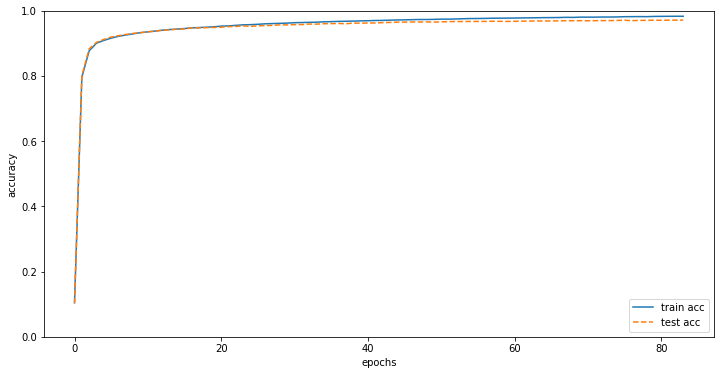

In [56]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 6 

# Accuracy 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

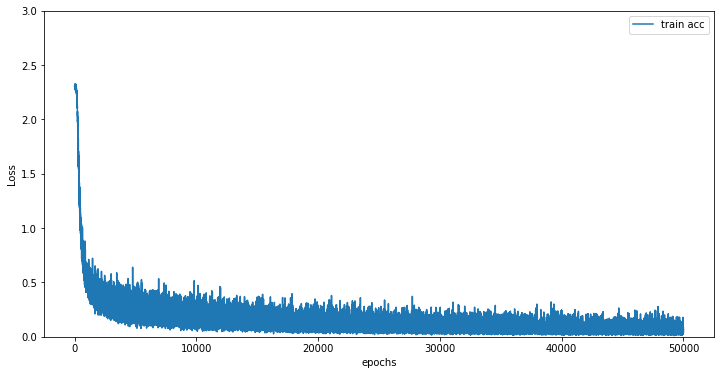

In [57]:
# Loss 그래프 그리기
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label='train acc')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.ylim(0, 3.0)
plt.legend(loc='best')
plt.show()